# TDPF: sensitivity of parameters

This tutorial adds more detail to the tutorial about Temperature Dependent Power Flow (TDPF) by exploring the influence of different input parameters. The method, plots and parameter variations are based on the following paper:

B. Ngoko, H. Sugihara and T. Funaki, "A Temperature Dependent Power Flow Model Considering Overhead Transmission Line Conductor Thermal Inertia Characteristics," 2019 IEEE International Conference on Environment and Electrical Engineering and 2019 IEEE Industrial and Commercial Power Systems Europe (EEEIC / I&CPS Europe), 2019, pp. 1-6, doi: 10.1109/EEEIC.2019.8783234.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandapower.pf.create_jacobian_tdpf import calc_a0_a1_a2_tau, calc_T_ngoko

In [2]:
# conductor data
t_air = 40
t_max = 90
t_ref = 25
r_ref_ohm_per_m = 0.1824e-3
conductor_outer_diameter_m = 18.2e-3
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 1000
alpha = 0.004
solar_absorptivity = emissivity = 0.5
mc_joule_per_m_k = 525

# Wind speed

First, we calculate the overhead line temperature depending on the current that is flowing through the line for three different wind speed scenarios.

In [3]:
v_m_per_s = 0.5
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_05 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [4]:
v_m_per_s = 2
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_2 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [5]:
v_m_per_s = 5
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_5 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

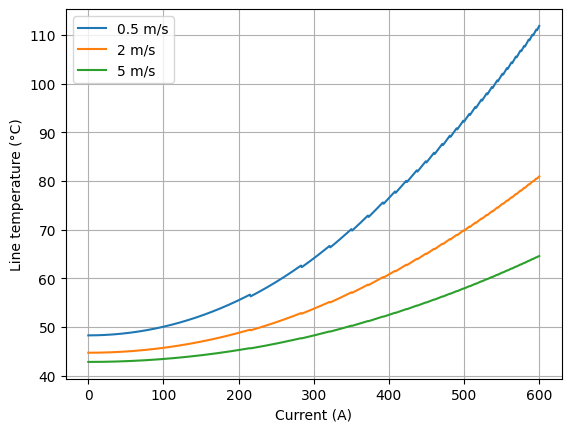

In [6]:
ax=plt.subplot()
ax.plot(np.vstack([t_05, t_2, t_5]).T, label=["0.5 m/s", "2 m/s", "5 m/s"])
ax.grid(True)
ax.set_ylabel('Line temperature (°C)')
ax.set_xlabel('Current (A)')
ax.legend()

Wind speed has a very high effect on the calculation results. For example, at 300 A the impact of the wind speed between 0.5 m/s and 5 m/s corresponds to a difference in overhead line temperature of just below 50 °C vs. about 65~°C. For the maximum value of 600 A the effect of this parameter is even higher: about 65 °C vs. over 110 °C. The cooling effect increases exponentially with the increase of the line current.

# Air temperature

Here we specify three different scenarios for the air temperature.

In [7]:
v_m_per_s = 0.5
t_air = 0
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_0 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [8]:
t_air = 20
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_20 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [9]:
t_air = 40
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_40 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

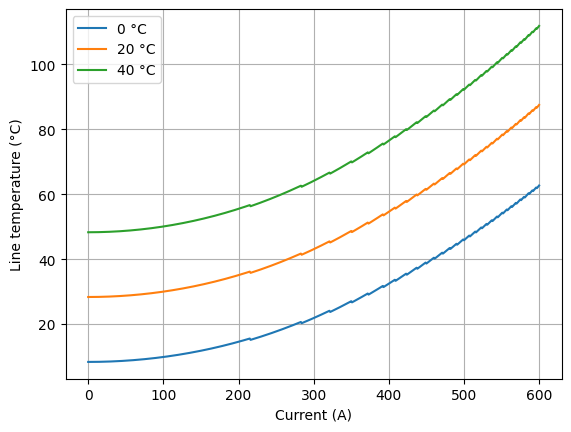

In [10]:
ax=plt.subplot()
ax.plot(np.vstack([t_0, t_20, t_40]).T, label=["0 °C", "20 °C", "40 °C"])
ax.grid(True)
ax.set_ylabel('Line temperature (°C)')
ax.set_xlabel('Current (A)')
ax.legend()

The air temperature has a high impact on the overhead line temperature. The cooling effect appears to remain constant with the change of the line current.

# Wind Direction

We specify three different scenarios for the wind angle of attack.

In [11]:
v_m_per_s = 0.5
wind_angle_degree = 0
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_0 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [12]:
wind_angle_degree = 45
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_45 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [13]:
wind_angle_degree = 90
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_90 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

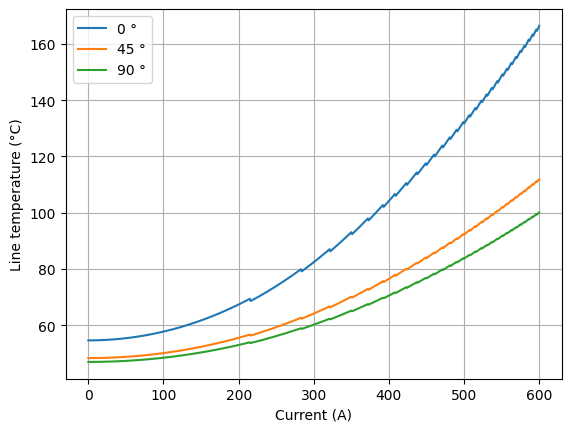

In [14]:
ax=plt.subplot()
ax.plot(np.vstack([t_0, t_45, t_90]).T, label=["0 °", "45 °", "90 °"])
ax.grid(True)
ax.set_ylabel('Line temperature (°C)')
ax.set_xlabel('Current (A)')
ax.legend()

Wind direction has a very high impact on the result. The highest cooling effect is observed with the wind angle of 90 °C. The impact of the wind angle increases exponentially with the increase in the line current.

# Solar Radiation

In [15]:
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 0
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_0 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [16]:
s_w_per_square_meter = 500
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_500 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [17]:
s_w_per_square_meter = 1000
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_1000 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

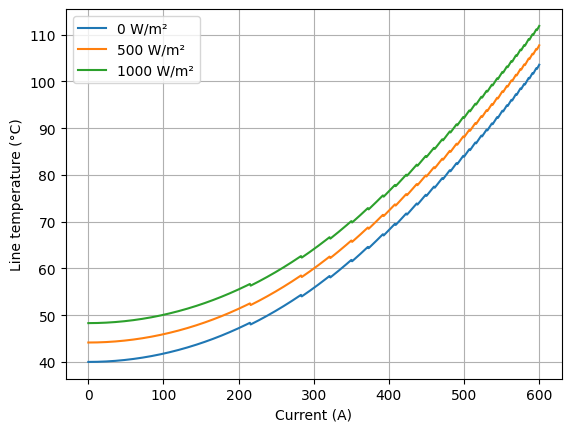

In [18]:
ax=plt.subplot()
ax.plot(np.vstack([t_0, t_500, t_1000]).T, label=["0 W/m²", "500 W/m²", "1000 W/m²"])
ax.grid(True)
ax.set_ylabel('Line temperature (°C)')
ax.set_xlabel('Current (A)')
ax.legend()

The impact of the solar radiation appears to be lower than one of the other weather parameters, and is even reduced slightly at higher currents. It should be acceptable in practice to use assumptions for the solar radiation if the exact data are not available.

# Conclusion

The wind speed, ambient air temperature and the wind angle of attack are the most relevant parameters.

# Thermal inertia

The following example demonstrates the thermal inertia effect with a current surge from 250 A to 450 A, starting with the steady-state line temperature.

In [19]:
t_air = 40
t_max = 90
t_ref = 20
r_ref_ohm_per_m = 0.1824e-3
conductor_outer_diameter_m = 18.2e-3
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 1000
alpha = 0.004
solar_absorptivity = emissivity = 0.5
mc_joule_per_m_k = 525

a0, a1, a2, tau = calc_a0_a1_a2_tau(t_air, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

In [20]:
t_start = calc_T_ngoko(250**2, a0, a1, a2, None, None, None)
t = [calc_T_ngoko(450**2, a0, a1, a2, t_min * 60, t_start, tau) for t_min in range(41)]

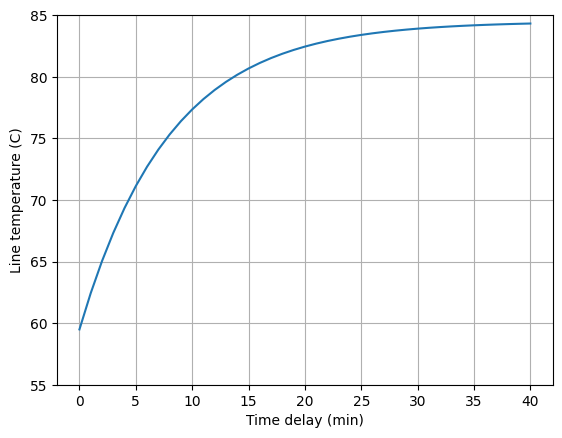

In [21]:
ax=plt.subplot()
ax.plot(t)
ax.grid(True)
ax.set_ylim([55, 85])
ax.set_ylabel('Line temperature (C)')
ax.set_xlabel('Time delay (min)');

The thermal inertia behavior demonstrates that there is a delay from a step change of current until the new steady state temperature is established. The majority of the temperature increase happens in the first 15 min. The thermal inertia consideration is useful for analyzing contingencies and evaluating preventive and curative grid operation strategies.